<a href="https://colab.research.google.com/github/sbarkerclarke-phd/PersistenceForWearables/blob/main/Siamrut_StephPersistence_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ripser
!pip install persim 

# Persistence image analysis of wearable data
Authors: Siamrut Patanavich and Steph Owen




In [8]:
#load libraries

import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersImage
from persim import PersistenceImager

import pandas as pd
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


In [156]:

#-------------------------------------------------------------------------------------------------------------------
#df = pd.read_csv("/Users/Siamrut/Desktop/NeuroDegenerative/PD_data/cis_pd_sensor_data/smartwatch_accelerometer/b56726c3-576e-4e8d-85c3-adb471e8eb42.csv")
df = pd.read_csv("/content/drive/MyDrive/wearables/ee1057ef-38ec-4418-bdfa-0dbdd66ce4da.csv")
#df = pd.read_csv("/content/drive/MyDrive/wearables/ee199312-4a2e-4c8d-9a03-96563ba74c9b.csv")
#Importing Data from CSV - files below are extremes where 0 is when patient is on drugs and no tremors (0) and ($) when patient had tremors and off drugs
# learning_the_data.csv
# b56726c3-576e-4e8d-85c3-adb471e8eb42.csv	1004	0	0	0 
# e94eee19-58a8-485e-b7e6-627ef92f5d32.csv	1004	4	4	4
# CIS-PD dataset is sampled at 0.02 seconds rate 




In [157]:
#Setting up sampling parameters 
#samp_itv = sampling interval for the size of the sampling window 30 seconds will consist of 1,500 datapoints 
#overlap = the amount of overlap we will have of the data points, the max overlap would be complete overlap. 
#An option for us is to make the sample rate courser - "will this impact the answer that much?"
#

midpoint = 600 # place in the data where the data started to be collected
step_size = 45  # value in seconds
window_size = 5 # value in seconds
sample_number= 8 #number of tables we want
start_time = midpoint-(round(sample_number/2)*step_size)
start_time


420

In [158]:
datas = []

for i in range(sample_number):
    local_start_time = start_time+(i*step_size)
    filterdf = df[df['Timestamp'].between(local_start_time, local_start_time+window_size)] #filter based on timestamp
    list_version = [list(row) for row in filterdf.values]
    list_version = [row[1:] for row in list_version]
    data = np.array(list_version)
    datas.append(data)


In [165]:
rips = Rips(maxdim=3, coeff=3)



Rips(maxdim=3, thresh=inf, coeff=3, do_cocycles=False, n_perm = None, verbose=True)


In [ ]:
diagrams_h1 = [rips.fit_transform(data)[1] for data in datas]
diagrams_h2 = [rips.fit_transform(data)[2] for data in datas]

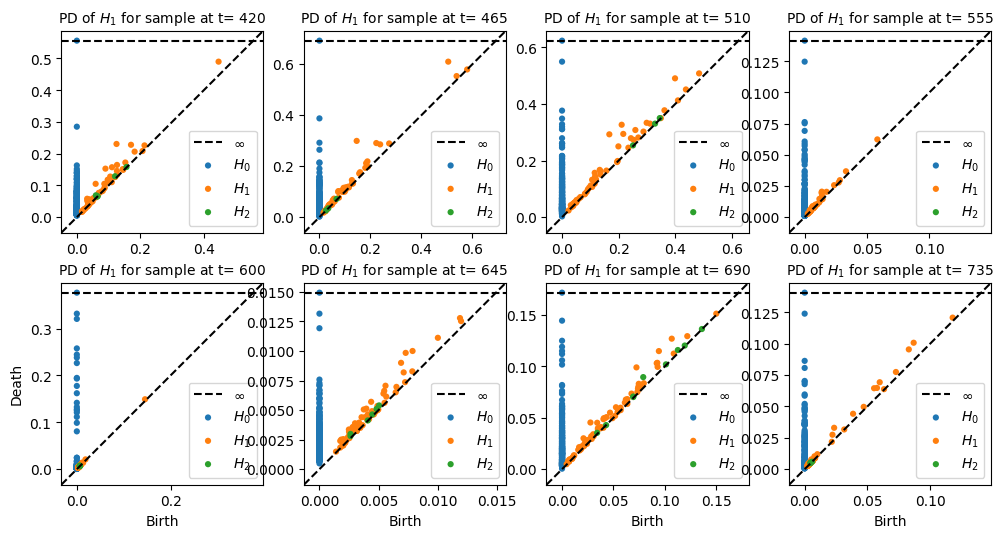

In [161]:
plt.figure(figsize=(12,6))

for i in range(sample_number):
  plt.subplot(240+i+1)
  rips.plot(diagrams[i], show=False)
  plt.ylabel("")
  if i<4:
    plt.xlabel("")
  if (i==0 | i==4):
    plt.ylabel("Death")
  plt.title("PD of $H_1$ for sample at t= " + str(start_time+step_size*i) + " ", size=10)

plt.show()


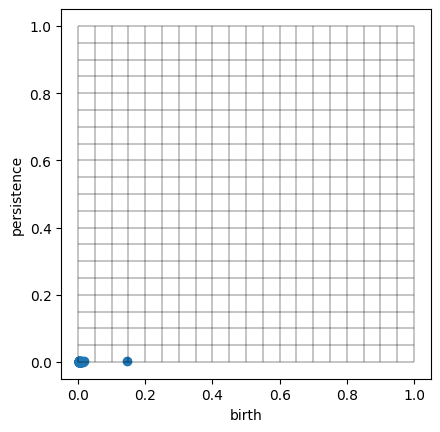

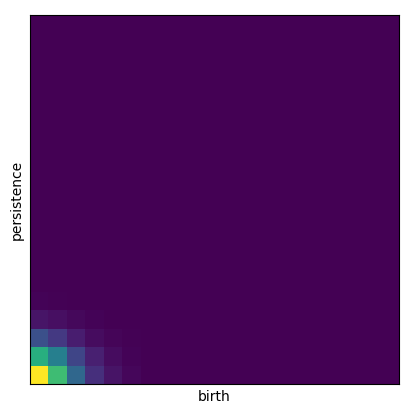

In [162]:
pimgr = PersistenceImager(pixel_size=0.05)
pimgr.kernel_params = {'sigma': .005}
pimgs = pimgr.transform(diagrams_h1, skew=True)


pimgr.plot_diagram(diagrams_h1[4], skew=True)
plt.show()
pimgr.plot_image(pimgs[4])
plt.show()



#ax = plt.subplot(122)
#pimgr.plot_image(imgs, ax)

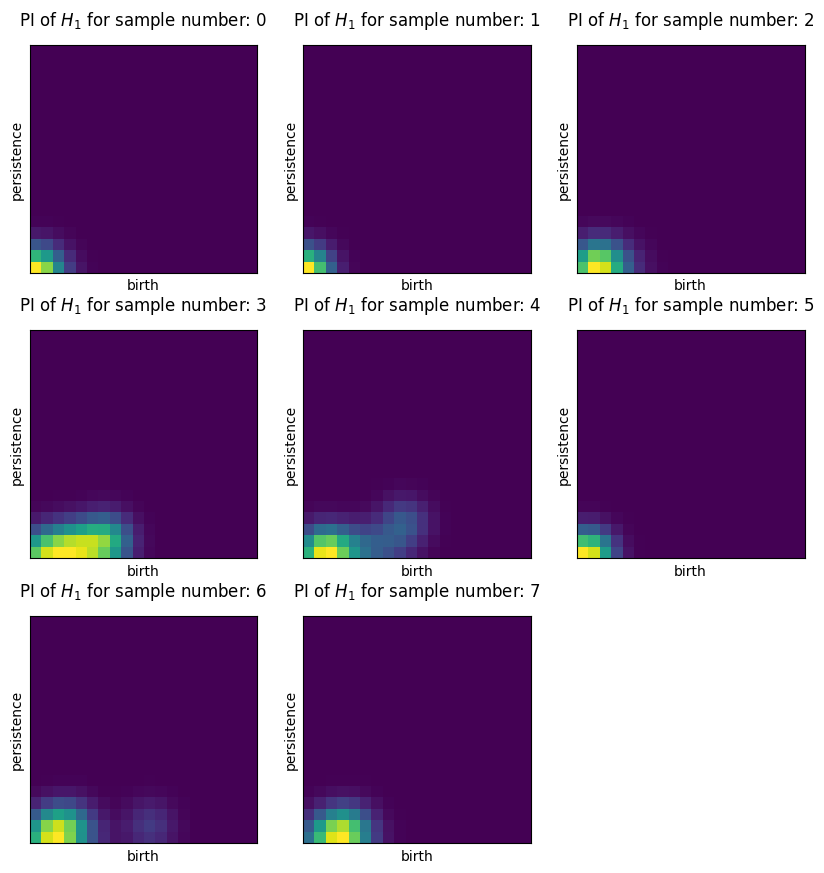

In [147]:
plt.figure(figsize=(10,10.5))

for i in range(sample_number):
    ax = plt.subplot(330+i+1)
    pimgr.plot_image(pimgs[i], ax)
    plt.title("PI of $H_1$ for sample number: " + str(i))

#plt.savefig('test.jpg')

In [163]:
pimgr = PersistenceImager(pixel_size=0.05)
pimgr.kernel_params = {'sigma': .005}
pimgr.fit(diagrams_h2)
imgs2 = pimgr.transform(diagrams_h2, skew=True)


ValueError: ignored

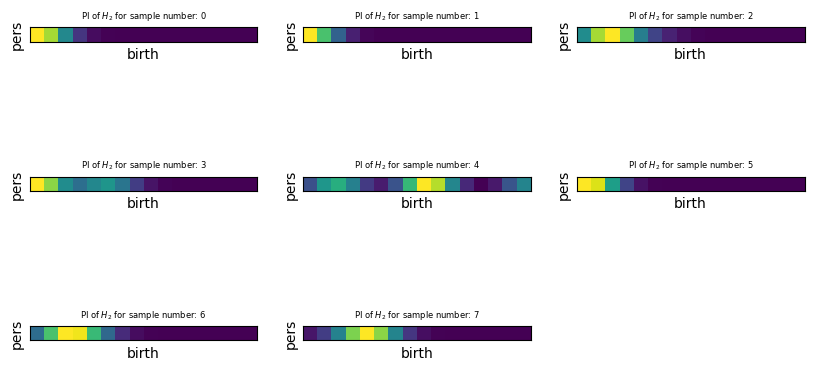

In [164]:
plt.figure(figsize=(10,5.5))

for i in range(sample_number):
    ax = plt.subplot(330+i+1)
    pimgr.plot_image(imgs2[i], ax )
    plt.ylabel("pers")
    plt.title("PI of $H_2$ for sample number: " + str(i), size=6)

#plt.savefig('test.jpg')